In [27]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## Addressing Missing Data

In [38]:
# import data
planes = pd.read_csv('../data/planes.csv')
planes

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


### Dealing with missing data

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

In [7]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


### Strategies for remaining missing data

The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!
Now, you need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.
You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


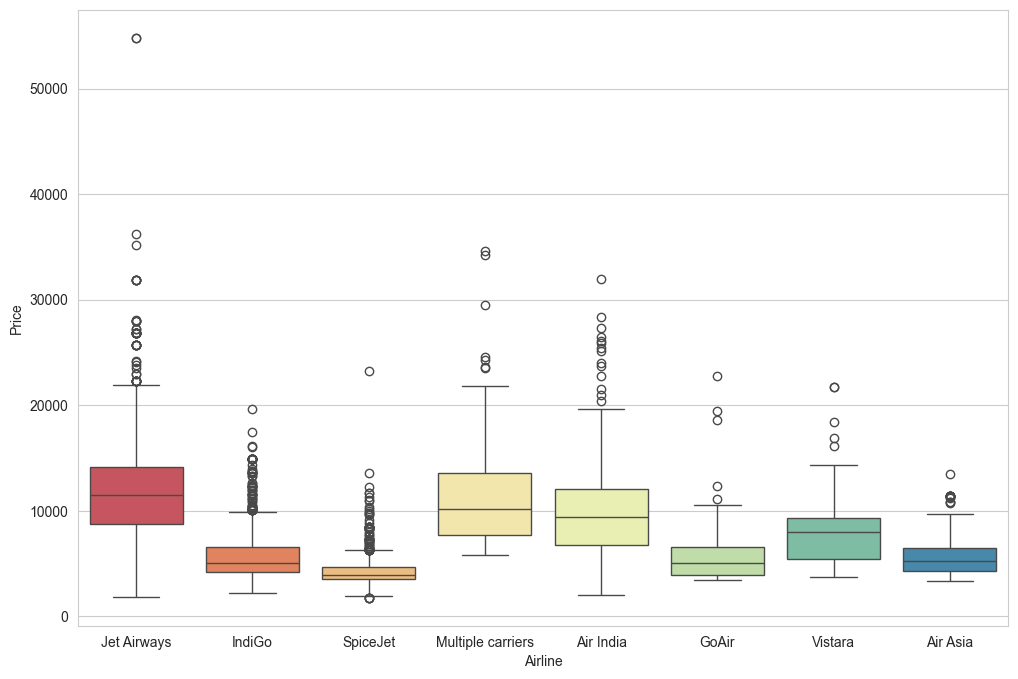

In [14]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
plt.figure(figsize=(12, 8))
sns.boxplot(data=planes, x="Airline", y="Price", hue='Airline', palette='Spectral')
plt.show()

### Imputing missing plane prices

You've removed the "Additional_Info" column from planes—the last step is to impute the missing data in the "Price" column of the dataset.

In [19]:
#planes = planes.drop('Additional_Info', axis=1)

# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


## Coverting and analyzing categorical data

### Finding the number of unique values

You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.

In [24]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


### Flight duration categories

In [25]:
planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

You'll create a "Duration_Category" column in the planes DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

In [30]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium",  "Long-haul"]

# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "10h|11h|12h|13h|14h|15h|16h"

### Adding duration categories

Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!
The variables flight_categories, short_flights, medium_flights, and long_flights that you previously created are available to you.

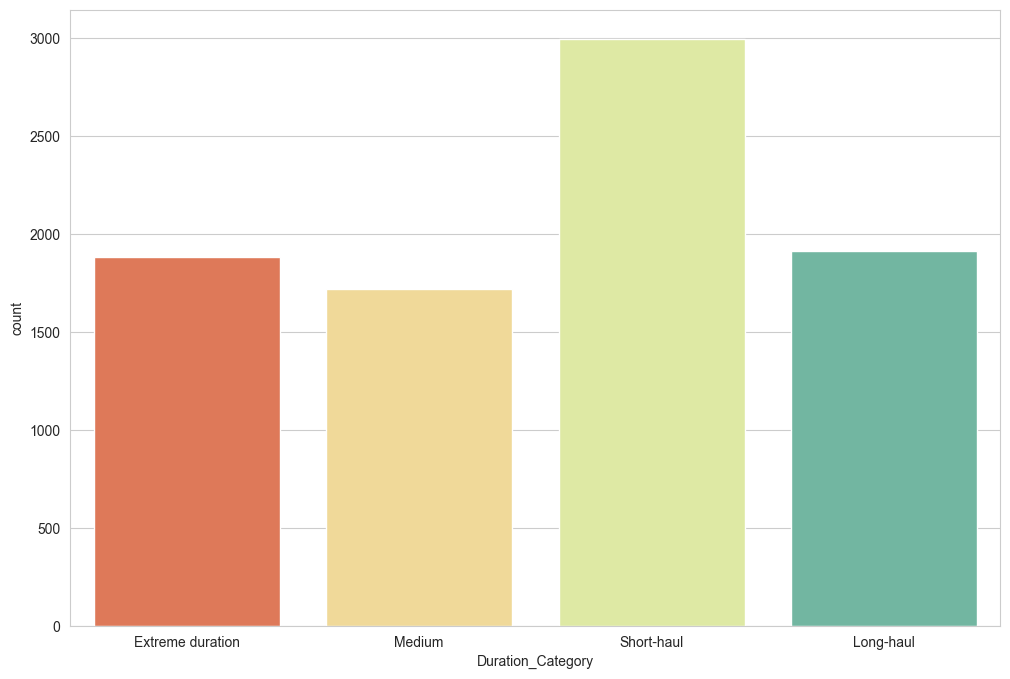

In [31]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
plt.figure(figsize=(12, 8))
sns.countplot(data=planes, x="Duration_Category", hue='Duration_Category', palette='Spectral')
plt.show()

## Working with numeric data

### Flight duration

You would like to analyze the duration of flights, but unfortunately, the "Duration" column in the planes DataFrame currently contains string values.

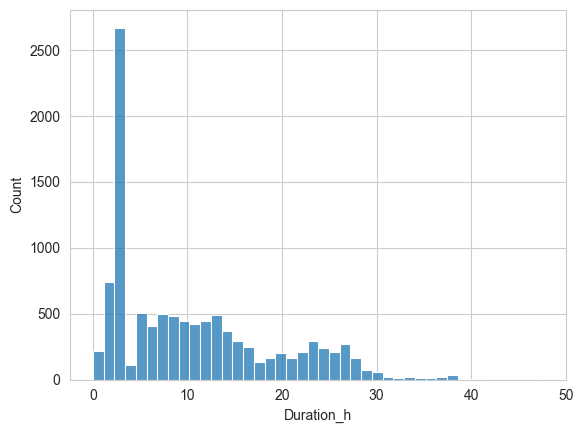

In [55]:
# Preview the column
#print(planes["Duration"].head())
planes = planes.drop("Duration_h", axis=1)

# Function to convert into hour
def time_string_to_float(time_str):
    """
    Converts a time string into a float representing the total hours.
    
    Args:
    time_str (str): Time in string format (e.g., "19h", "7h 30m", "45m").
    
    Returns:
    float: Total hours as a float.
    """
    # Initialize total hours
    total_hours = 0.0
    
    # Split the input string into components
    time_components = time_str.split()
    
    for component in time_components:
        if 'h' in component:
            # Extract hours
            hours = int(component[:-1])  # Remove the 'h' and convert to int
            total_hours += hours
        elif 'm' in component:
            # Extract minutes
            minutes = int(component[:-1])  # Remove the 'm' and convert to int
            total_hours += minutes / 60.0  # Convert minutes to hours
    
    return total_hours

# Create a new column called Duration_h and stored the duration value as hours
planes["Duration_h"] = planes.apply(lambda row: time_string_to_float(str(row.Duration)), axis=1 )

# Remove the string character
#planes["Duration"] = planes["Duration"].str.replace("h","")

# Plot a histogram
sns.histplot(data=planes, x='Duration_h')
plt.show()

### Duration_h

Now "Duration_h" and "Price" both contain numeric values in the planes DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

In [56]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4230.748840             3685
IndiGo             2266.753552             1981
Air India          3865.871975             1686
Multiple carriers  3763.674706             1148
SpiceJet           1790.851944              787
Vistara            2864.267802              455
Air Asia           2016.738954              309
GoAir              2790.815129              182
Name: count, dtype: int64


In [57]:
# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration_h"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.333333                  3685
IndiGo             2.916667                   1981
Air India          15.333333                  1686
Multiple carriers  10.208333                  1148
SpiceJet           2.500000                    787
Vistara            3.166667                    455
Air Asia           2.833333                    309
GoAir              4.458333                    182
Name: count, dtype: int64


In [58]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10506.993486              4391
Banglore     9132.225153               2773
Delhi        5157.794118               1219
New Delhi    11738.589499               888
Hyderabad    5025.210280                673
Kolkata      4801.489796                369
Name: count, dtype: int64


## Handling outliers

### Identifying outliers

Try to figure out if there are outliers in the "Price" or "Duration" columns of the planes DataFrame

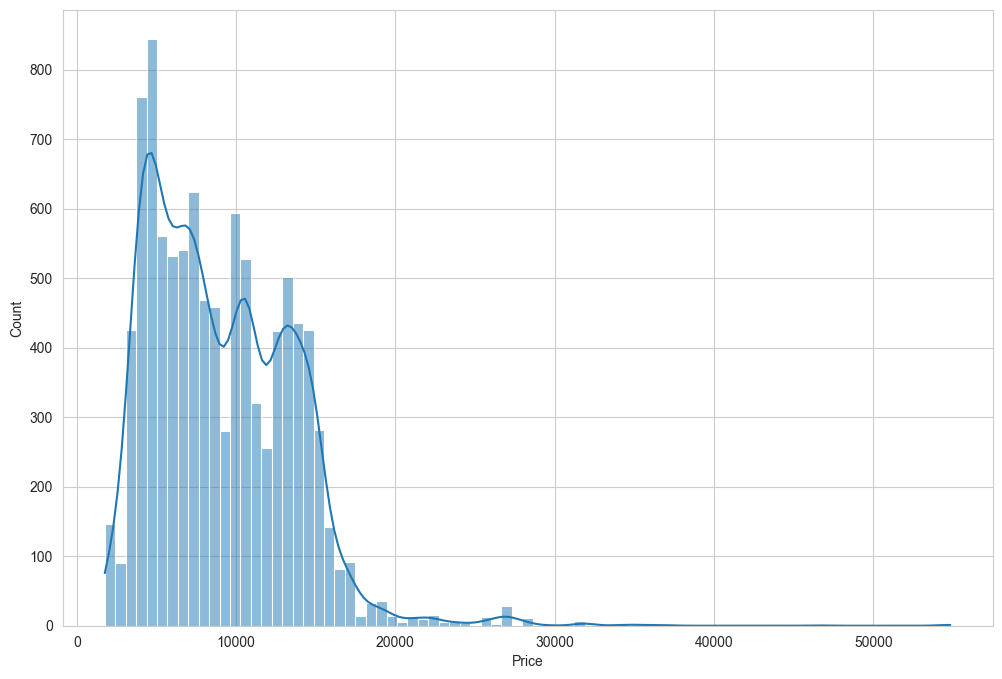

In [59]:
# Plot a histogram of flight prices
plt.figure(figsize=(12, 8))
sns.histplot(data=planes, x='Price', kde=True)
plt.show()

In [62]:
# Display descriptive statistics for flight duration
print(planes["Duration_h"].describe())

count    10660.000000
mean        10.508537
std          8.520648
min          0.000000
25%          2.833333
50%          8.416667
75%         15.416667
max         47.666667
Name: Duration_h, dtype: float64


### Removing outliers

While removing outliers isn't always the way to go, for your analysis, you've decided that you will only include flights where the "Price" is not an outlier.
Therefore, you need to find the upper threshold and then use it to remove values above this from the planes DataFrame.

In [66]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count     9959.000000
mean      8875.160860
std       4057.202002
min       1759.000000
25%       5228.000000
50%       8283.000000
75%      12284.000000
max      23001.000000
Name: Price, dtype: float64
